<center><h1>BREAST CANCER PREDICTION </h1> </center>

# Importing Libraries


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Ignoring Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [7]:
data_BCD = pd.read_csv("C:/Users/Admin/Desktop/Breast_cancer_data.csv")
print(data_BCD.sample(10))

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
326        14.11         12.88           90.03      616.5          0.09309   
25         17.14         16.40          116.00      912.7          0.11860   
15         14.54         27.54           96.73      658.8          0.11390   
29         17.57         15.05          115.00      955.1          0.09847   
215        13.86         16.93           90.96      578.9          0.10260   
364        13.40         16.95           85.48      552.4          0.07937   
291        14.96         19.10           97.03      687.3          0.08992   
396        13.51         18.89           88.10      558.1          0.10590   
79         12.86         18.00           83.19      506.3          0.09934   
473        12.27         29.97           77.42      465.4          0.07699   

     diagnosis  
326          1  
25           0  
15           0  
29           0  
215          0  
364          1  
291          1  
396  

In [8]:
print(data_BCD.head(10))

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          0  
7          0  
8          0  
9          0 

In [9]:
# summary of dataset
data_BCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


- We can see that there are 6 columns in the dataset and there are no missing values.

In [10]:
# check the distribution of the target variable
data_BCD['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

- The target variable is `diagnosis`. It contains 2 values - 0 and 1. 

- `0` is for **Negative prediction** and `1` for **Positive prediction**.

- We  can see that the problem is binary classification task.

In [11]:
X = data_BCD[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = data_BCD['diagnosis']

# split the dataset into the training set and test set


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Model Development and Training

In [13]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb531659d48d3cb/lightgbm-4.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.3 MB 2.0 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.3 MB 3.0 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.3 MB 3.9 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.3 MB 4.0 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.3 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 249, number of negative: 149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625628 -> initscore=0.513507
[LightGBM] [Info] Start training from score 0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

LGBMClassifier()

# Model Prediction

In [15]:
# predict the results
y_pred=clf.predict(X_test)


In [16]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9298


- Here, `y_test` are the true class labels and `y_pred` are the predicted class labels in the test-set.

In [17]:
y_pred_train = clf.predict(X_train)

In [18]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [19]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9298


- The training and test set accuracy are quite comparable. So, we cannot say there is overfitting.

# Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 55   8]
 [  4 104]]

True Positives(TP) =  55

True Negatives(TN) =  104

False Positives(FP) =  8

False Negatives(FN) =  4


<Axes: >

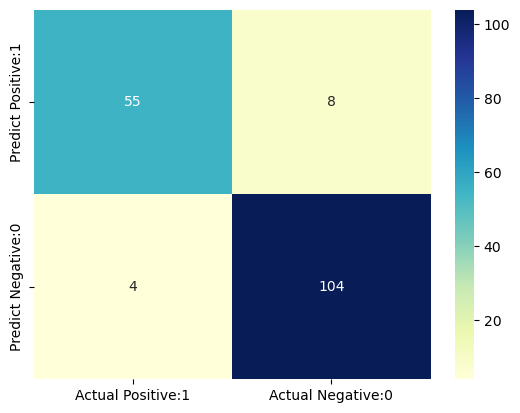

In [21]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        63
           1       0.93      0.96      0.95       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

